## Topic Modeling

## Open the file

In [4]:
import pandas as pd
file = "C:\\Users\\tejag\\Downloads\\DisneylandReviews.csv"
df = pd.read_csv(file, encoding='utf-8', encoding_errors='ignore')
df.head(20) 

Review_ID  Rating Year_Month     Reviewer_Location  \
0   670772142       4     2019-4             Australia   
1   670682799       4     2019-5           Philippines   
2   670623270       4     2019-4  United Arab Emirates   
3   670607911       4     2019-4             Australia   
4   670607296       4     2019-4        United Kingdom   
5   670591897       3     2019-4             Singapore   
6   670585330       5     2019-4                 India   
7   670574142       3     2019-3              Malaysia   
8   670571027       2     2019-4             Australia   
9   670570869       5     2019-3                 India   
10  670443403       5     2019-4         United States   
11  670435886       5     2019-4                Canada   
12  670376905       4     2019-4             Australia   
13  670324965       5     2019-4           Philippines   
14  670274554       5     2018-9             Australia   
15  670205135       3     2019-1        United Kingdom   
16  670199487       4     2019-4       Myanmar (Burma)   
17  670129921       3     2019-4        United Kingdom   
18  670099231       4     2019-4             Australia   
19  670033848       5    2018-11             Hong Kong   

                                          Review_Text               Branch  
0   If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1   Its been a while since d last time we visit HK...  Disneyland_HongKong  
2   Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3   HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4   the location is not in the city, took around 1...  Disneyland_HongKong  
5   Have been to Disney World, Disneyland Anaheim ...  Disneyland_HongKong  
6   Great place! Your day will go by and you won't...  Disneyland_HongKong  
7   Think of it as an intro to Disney magic for th...  Disneyland_HongKong  
8   Feel so let down with this place,the Disneylan...  Disneyland_HongKong  
9   I can go on talking about Disneyland. Whatever...  Disneyland_HongKong  
10  Disneyland never cease to amaze me! I've been ...  Disneyland_HongKong  
11  We spent the day here with our grown kids and ...  Disneyland_HongKong  
12  We spend two days, the second day went early t...  Disneyland_HongKong  
13  It was indeed the happiest place on earth! My ...  Disneyland_HongKong  
14  This place is HUGE! Definately need more than ...  Disneyland_HongKong  
15  We brought tickets before we left and got 2 da...  Disneyland_HongKong  
16  Its huge , not enough to visit in one day. We ...  Disneyland_HongKong  
17  Around   60 per person and if you want to eat ...  Disneyland_HongKong  
18  It   s Disneyland! It just does not need revie...  Disneyland_HongKong  
19  There is nothing more to say except that you b...  Disneyland_HongKong

## Look at a couple of texts

In [5]:
print(repr(df.iloc[2666]["Review_Text"][0:400]))
print(repr(df.iloc[4726]["Review_Text"][0:400]))

'This place is perfect for both elderly and kids.. We thoroughly enjoyed a day out, a perfect outing, it is not that big and we covered almost all attractions. It is recommended to visit in weekdays as there are long queues during weekend and you lose lots of time in the queue.'
'Got my ticket thru hong kong disneyland website. It was 10% cheaper and includEd a food voucher worth 130 hk$. Spend my morning at citygate outlet for shopping and luunch which was cheaper and better. Proceeded to disneyland by 2pm. This time it was cold with Fewer people than usual. Went around main street then space mountain and buzz lightyear astroblaster. Proceeded to flight of fancy parade. P'


## We will split speech into sentences

In [6]:
import re
df["paragraphs"] = df["Review_Text"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## Start by getting TFIDF

In [7]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert stop words set to a list
stopwords_list = list(stopwords)

# Initialize TfidfVectorizer with the list of stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['Review_Text'])
tfidf_text_vectors.shape

C:\Users\tejag\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(42656, 12424)

## Make a data frame of sentences

In [9]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "Review_Text": paragraph, "Year_Month": year }
for paragraphs, year in zip(df["paragraphs"], df["Year_Month"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

Review_Text Year_Month
0  If you've ever been to Disneyland anywhere you...     2019-4
1  Its been a while since d last time we visit HK...     2019-5
2  Thanks God it wasn   t too hot or too humid wh...     2019-4
3  HK Disneyland is a great compact park. Unfortu...     2019-4
4  the location is not in the city, took around 1...     2019-4
5  Have been to Disney World, Disneyland Anaheim ...     2019-4
6  Great place! Your day will go by and you won't...     2019-4
7  Think of it as an intro to Disney magic for th...     2019-3
8  Feel so let down with this place,the Disneylan...     2019-4
9  I can go on talking about Disneyland. Whatever...     2019-3

## Get the TFIDF of the sentences DF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Use 'english' instead of the set of stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["Review_Text"])
tfidf_para_vectors.shape

(42656, 12415)

## NMF

In [11]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

## Done! Let’s look at our 10 topics:

In [12]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]] * 100.0 / total)))

# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())



Topic 00
 food (0.94)
 good (0.80)
 park (0.63)
 queues (0.62)
 rides (0.60)

Topic 01
 place (12.01)
 earth (5.59)
 happiest (5.36)
 magical (1.70)
 truly (1.43)

Topic 02
 disney (5.87)
 park (2.72)
 world (2.00)
 parks (1.87)
 florida (1.39)

Topic 03
 fast (3.27)
 pass (3.14)
 lines (1.92)
 line (1.71)
 wait (1.69)

Topic 04
 kong (8.03)
 hong (8.03)
 disneyland (2.72)
 visit (0.98)
 small (0.96)

Topic 05
 great (20.55)
 time (5.08)
 rides (2.20)
 family (2.09)
 food (1.50)

Topic 06
 mountain (3.21)
 ride (3.03)
 space (1.96)
 jones (1.22)
 rides (1.20)

Topic 07
 disneyland (5.33)
 love (2.51)
 time (1.82)
 year (1.58)
 visit (1.36)

Topic 08
 day (8.51)
 park (2.17)
 fireworks (1.78)
 parade (1.48)
 night (1.19)

Topic 09
 kids (9.07)
 fun (6.89)
 rides (2.40)
 adults (2.24)
 lots (1.56)


## Run same model

In [13]:
from sklearn.decomposition import NMF

# Initialize NMF model
nmf_para_model = NMF(n_components=10, random_state=42)

# Fit NMF model to the TF-IDF vectors
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Display topics
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
 food (0.90)
 good (0.78)
 queues (0.60)
 rides (0.57)
 queue (0.56)

Topic 01
 place (11.73)
 earth (5.40)
 happiest (5.17)
 magical (1.67)
 truly (1.40)

Topic 02
 disney (5.89)
 park (2.79)
 world (1.99)
 parks (1.88)
 florida (1.39)

Topic 03
 fast (3.26)
 pass (3.12)
 lines (1.91)
 line (1.70)
 wait (1.68)

Topic 04
 kong (7.95)
 hong (7.95)
 disneyland (2.70)
 visit (0.98)
 small (0.95)

Topic 05
 great (20.05)
 time (5.08)
 rides (2.21)
 family (2.12)
 food (1.58)

Topic 06
 mountain (3.26)
 ride (3.05)
 space (2.00)
 jones (1.24)
 indiana (1.22)

Topic 07
 disneyland (5.22)
 love (2.46)
 time (1.71)
 year (1.51)
 visit (1.28)

Topic 08
 day (8.23)
 park (2.28)
 fireworks (1.77)
 parade (1.48)
 night (1.18)

Topic 09
 kids (9.04)
 fun (6.77)
 rides (2.39)
 adults (2.25)
 lots (1.55)


 ## How “BIG” is each topic?

In [14]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([11.49448651,  7.64592804, 14.31425398, 10.38491235,  4.98800085,
        8.66406829,  8.80404907, 13.86654689, 10.23931371,  9.59844031])

## Topic sizes:

In [15]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([11.61288672,  7.71237264, 14.03476186, 10.32802668,  4.92283394,
        8.66516894,  8.87178767, 13.90852025, 10.38367165,  9.55996965])

## RUN this code:

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

# Assuming 'paragraph_df' is defined earlier
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Review_Text"])

# Check the shape of the document-term matrix
print("Shape of document-term matrix:", count_para_vectors.shape)

# Define and fit the LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

C:\Users\tejag\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


Shape of document-term matrix: (42656, 12424)


## Start by cutting the paragraphs into words:

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list
stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Review_Text"])
print(count_para_vectors.shape)


(42656, 12424)


## Run the LDA

In [20]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
ride park disneyland line rides

Topic 2:
disney park rides queue food

Topic 3:
rides ride day parade park

Topic 4:
disney disneyland park parks world

Topic 5:
food park water bring expensive

Topic 6:
day tickets park disneyland time

Topic 7:
park staff disney rides great

Topic 8:
rides time great mountain ride

Topic 9:
place disneyland disney time kids

Topic 10:
park time day rides fast


## Topic sizes

In [21]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([10.15686881, 10.6714236 ,  6.94796899, 11.39735684,  6.69190409,
        7.05740962,  9.72900885,  9.98344627, 14.93353525, 12.43107769])

## draw wordclouds for the 10 topics

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

## The NMF wordclouds:

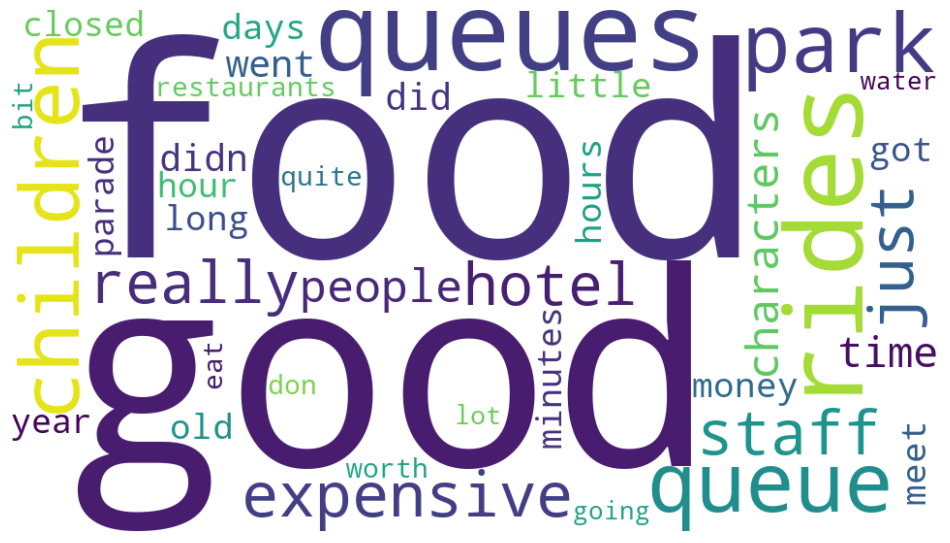

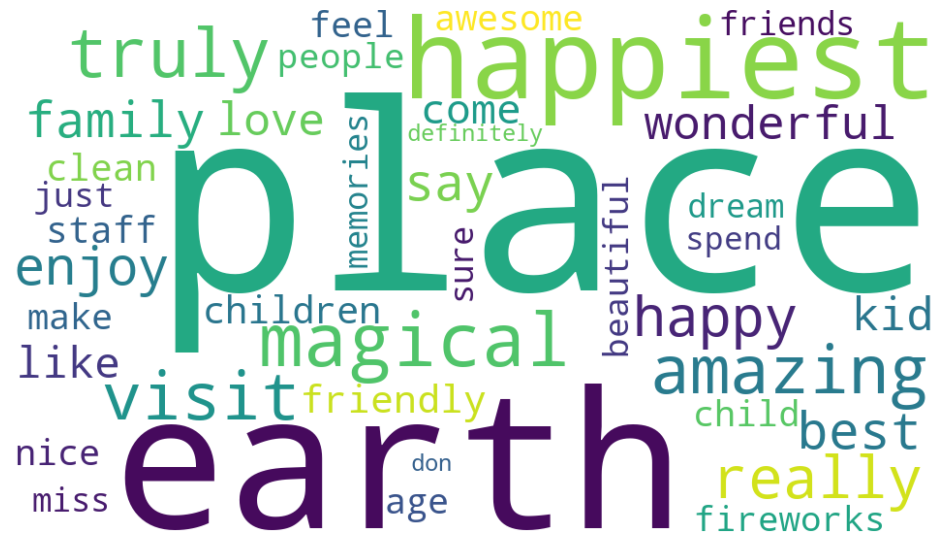

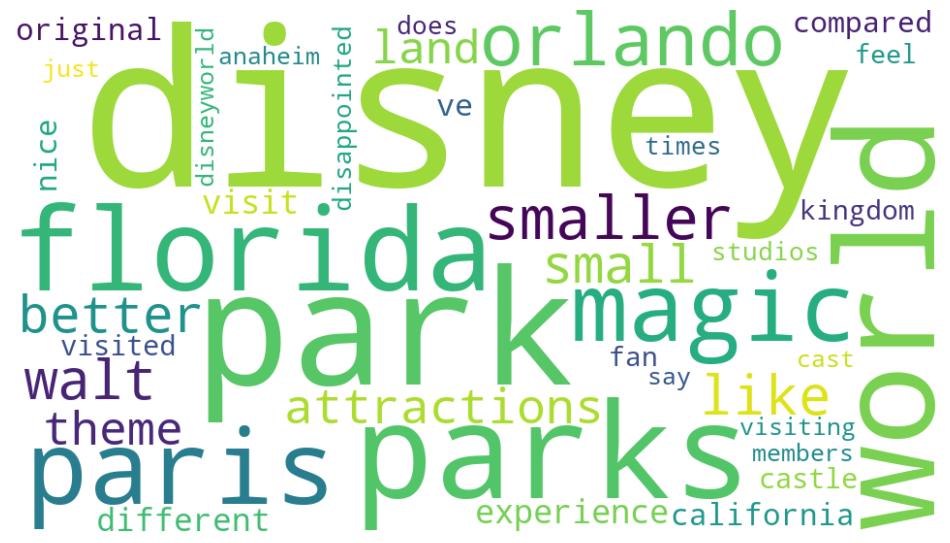

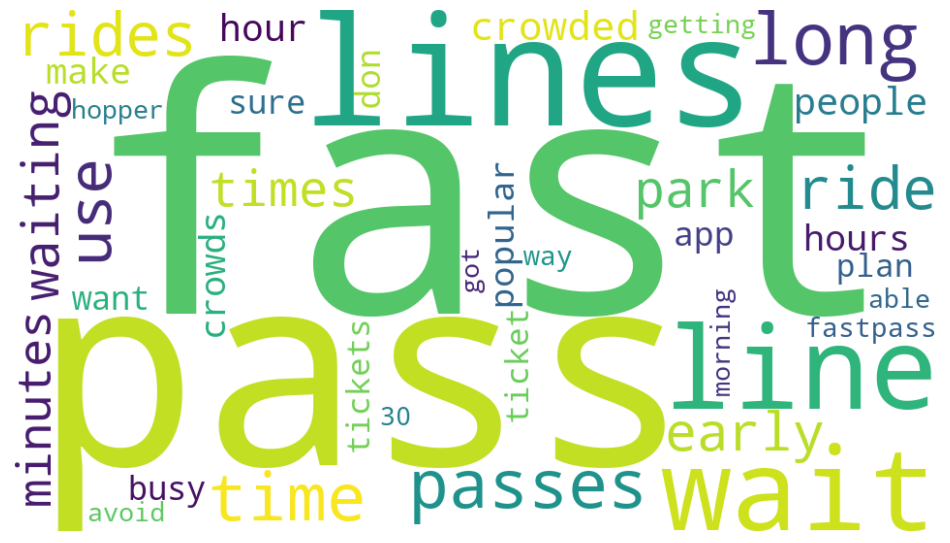

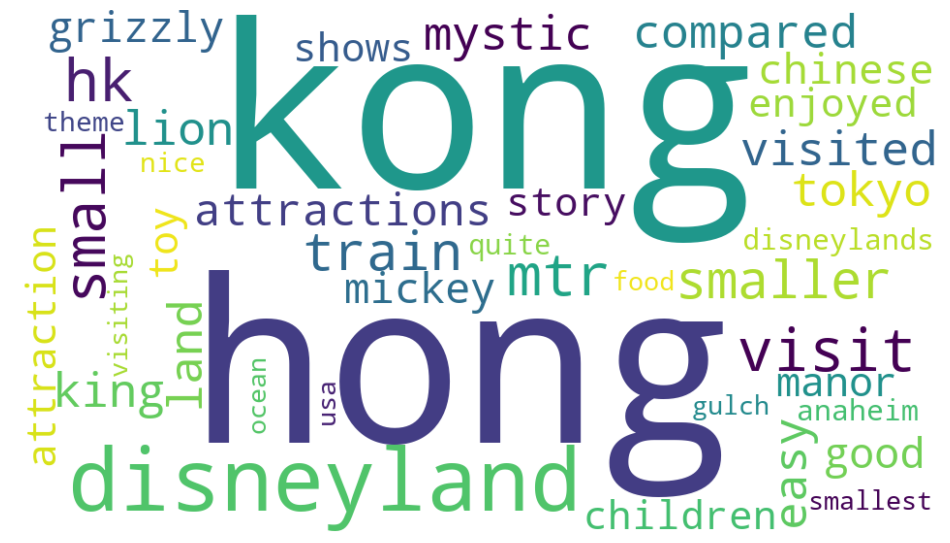

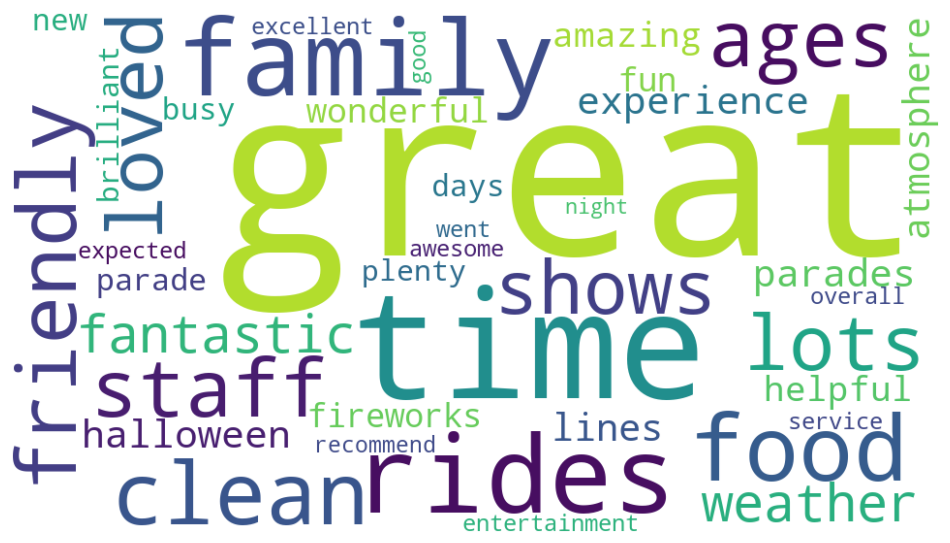

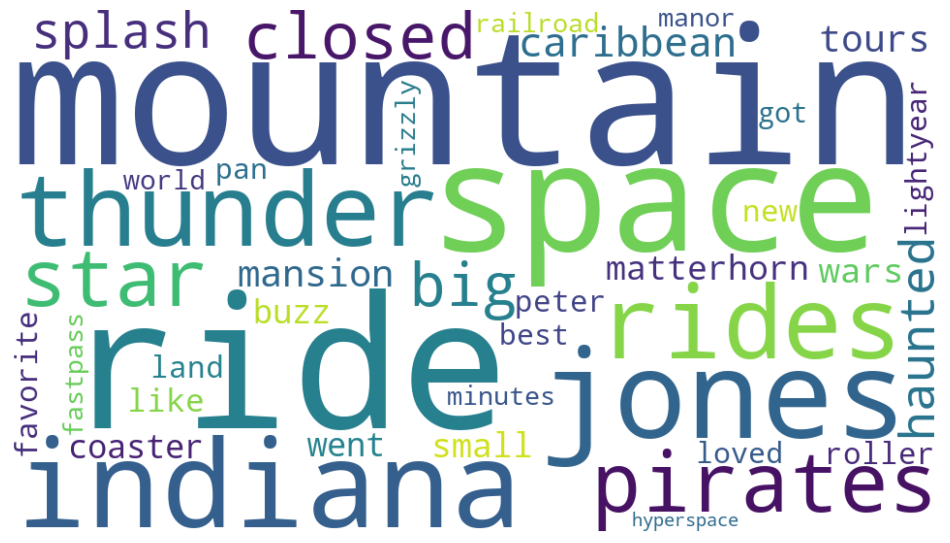

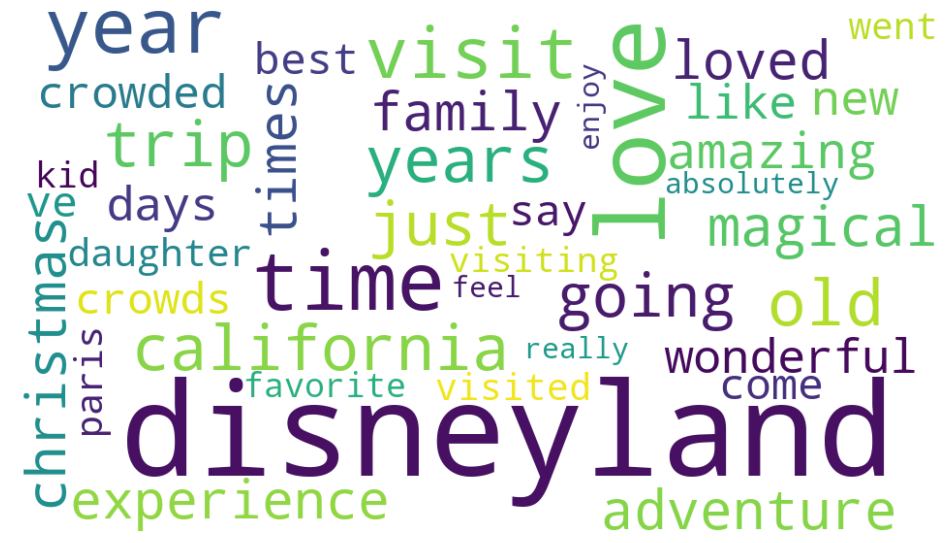

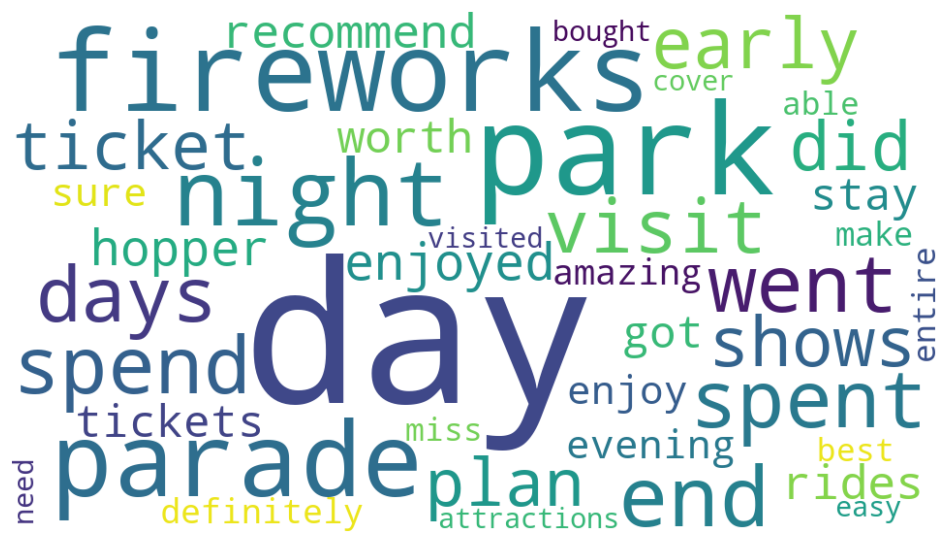

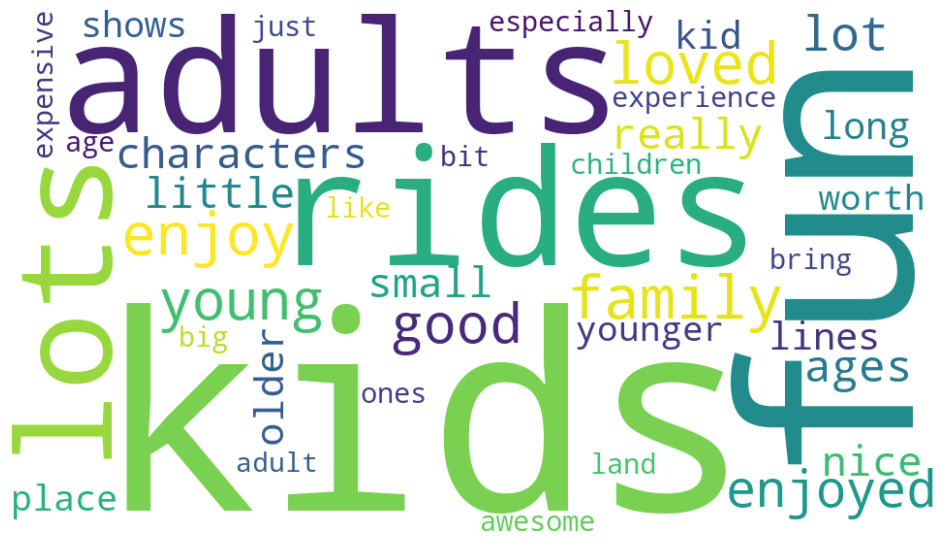

In [23]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

## The LDA wordclouds

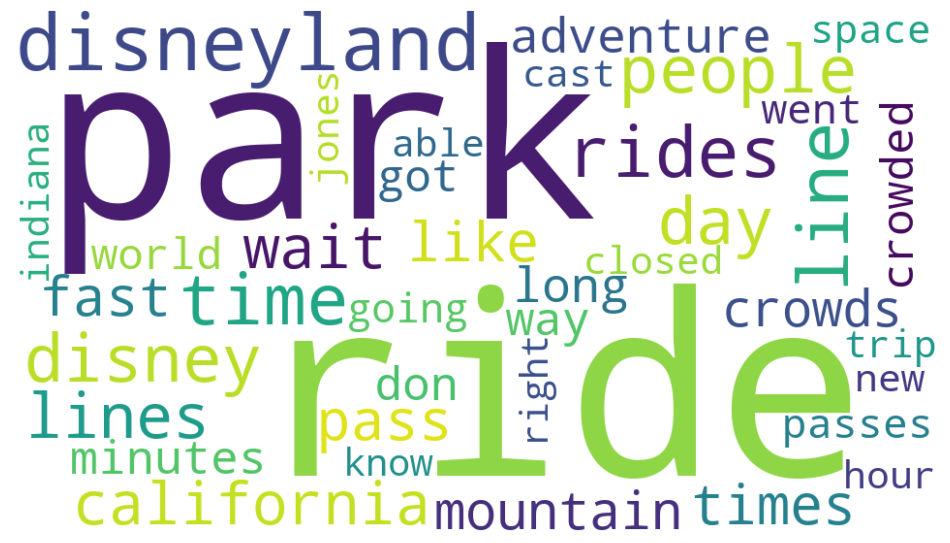

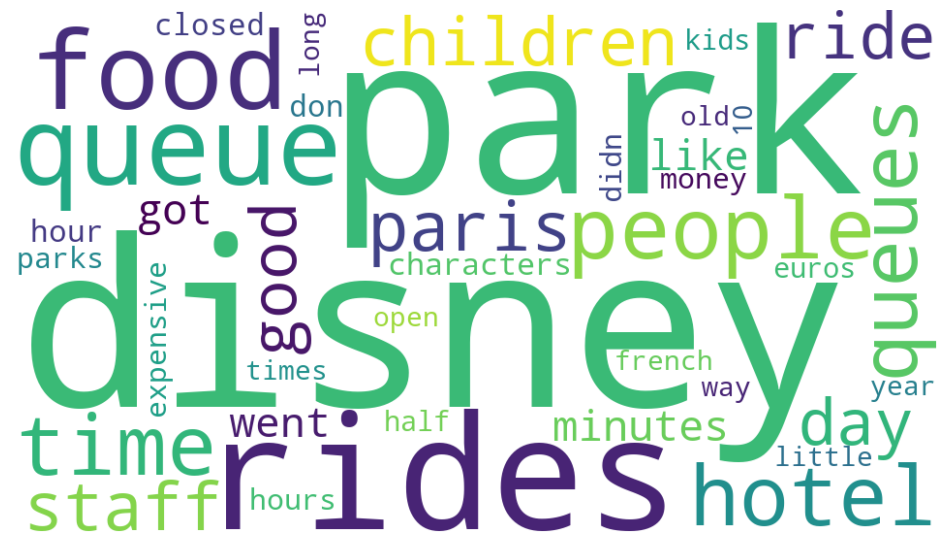

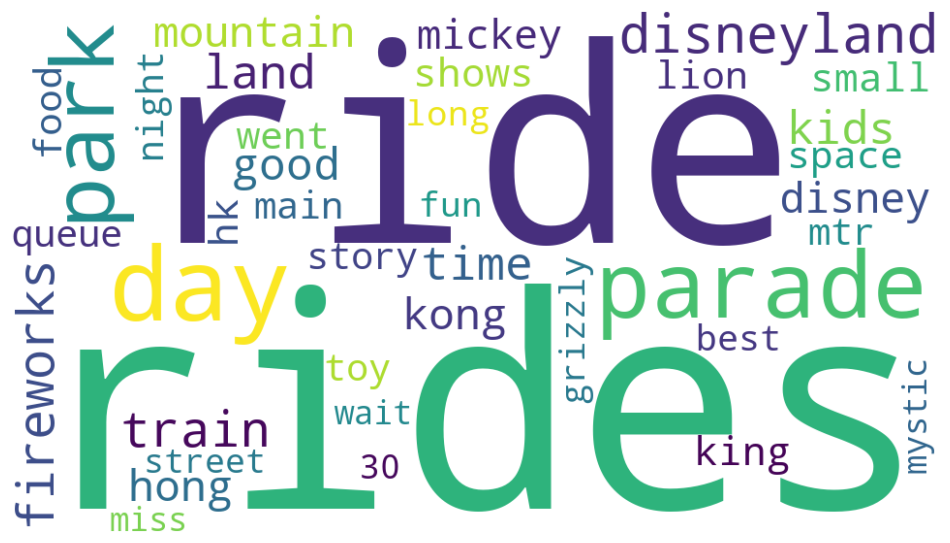

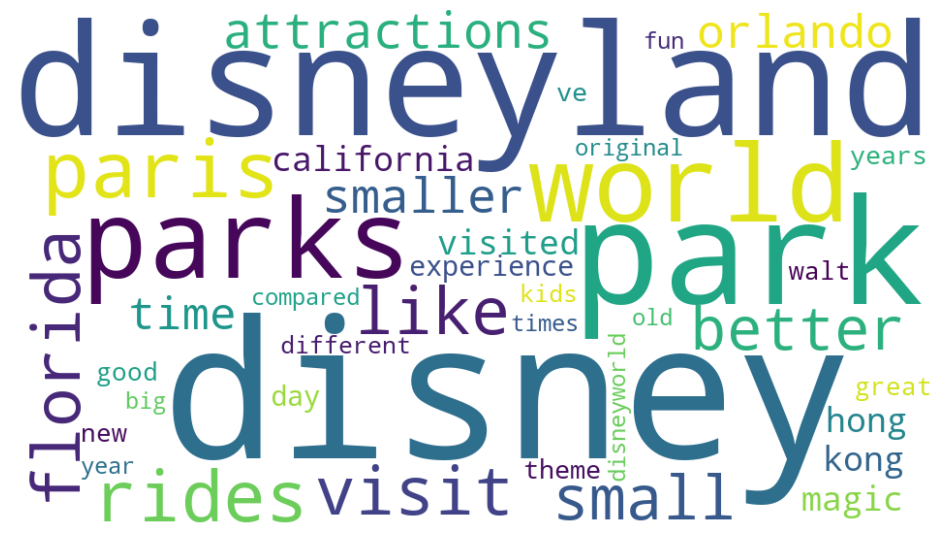

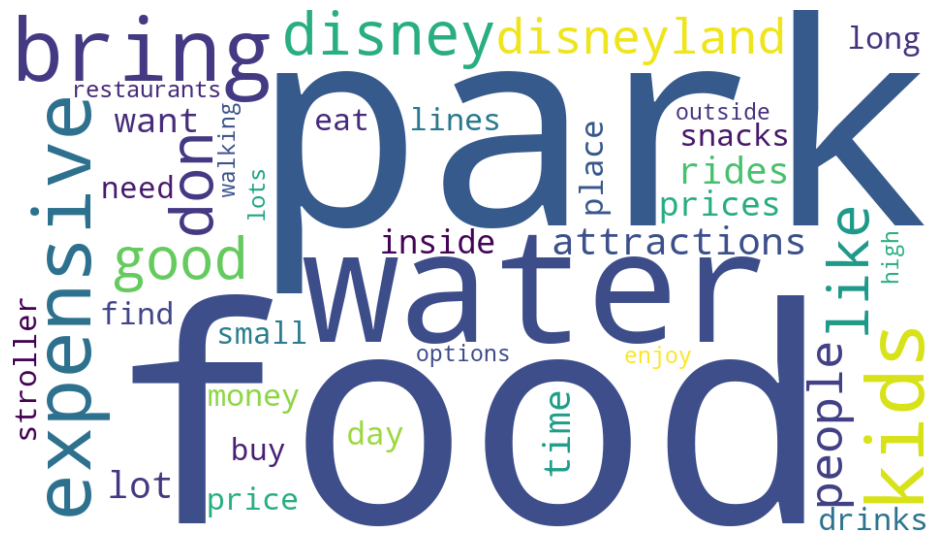

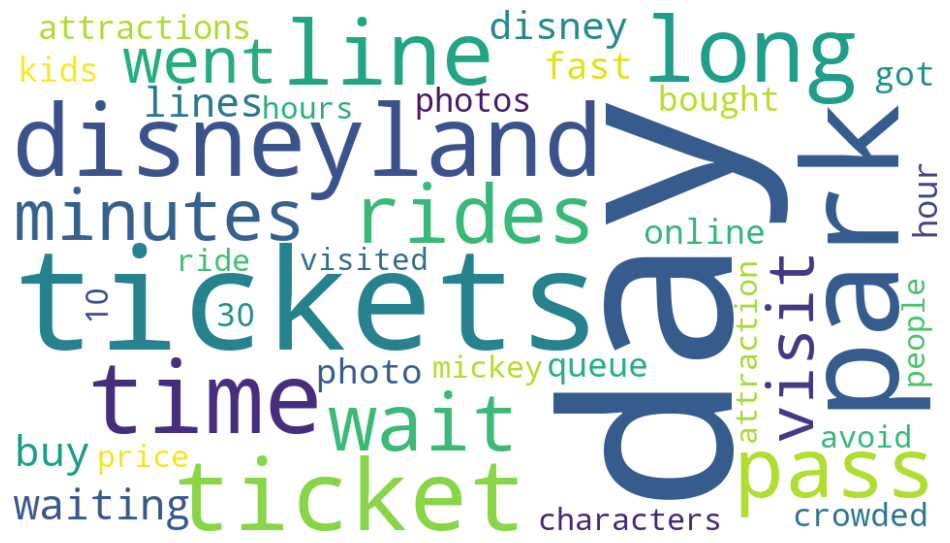

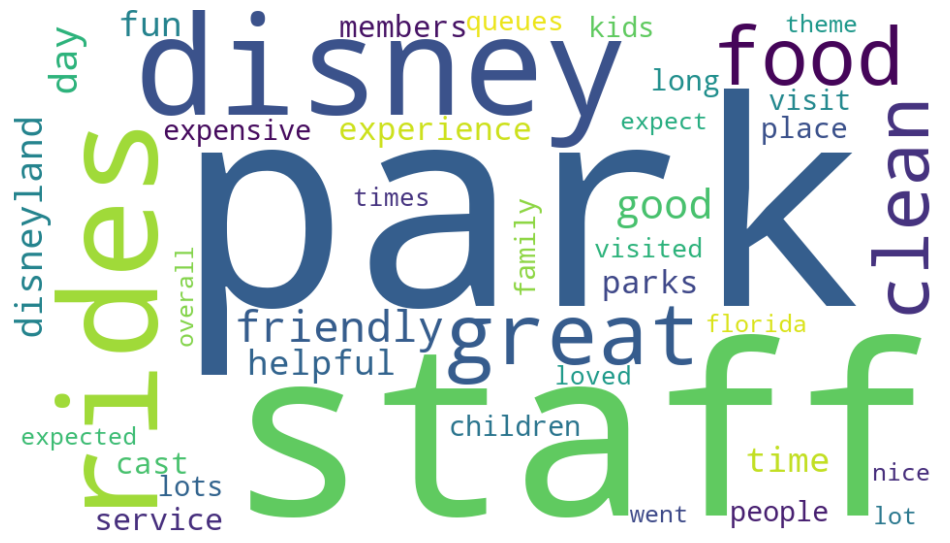

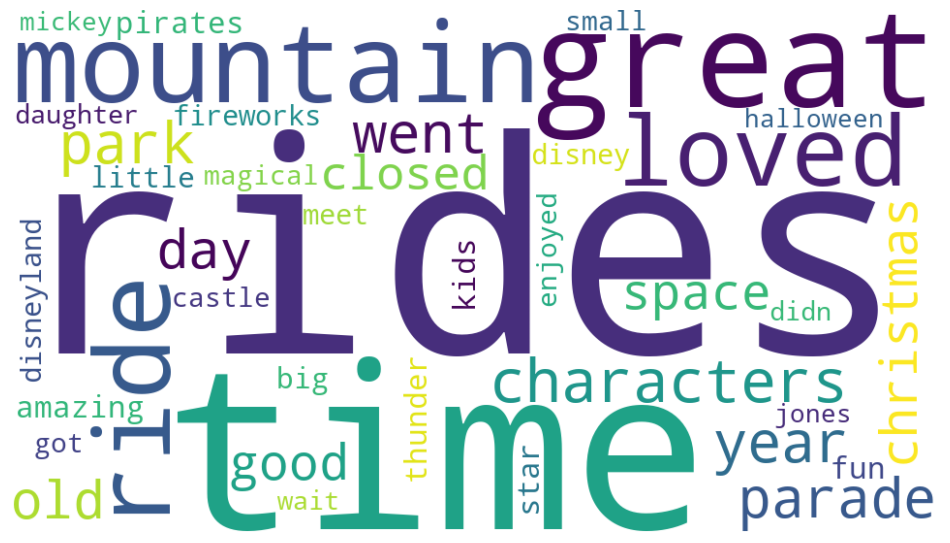

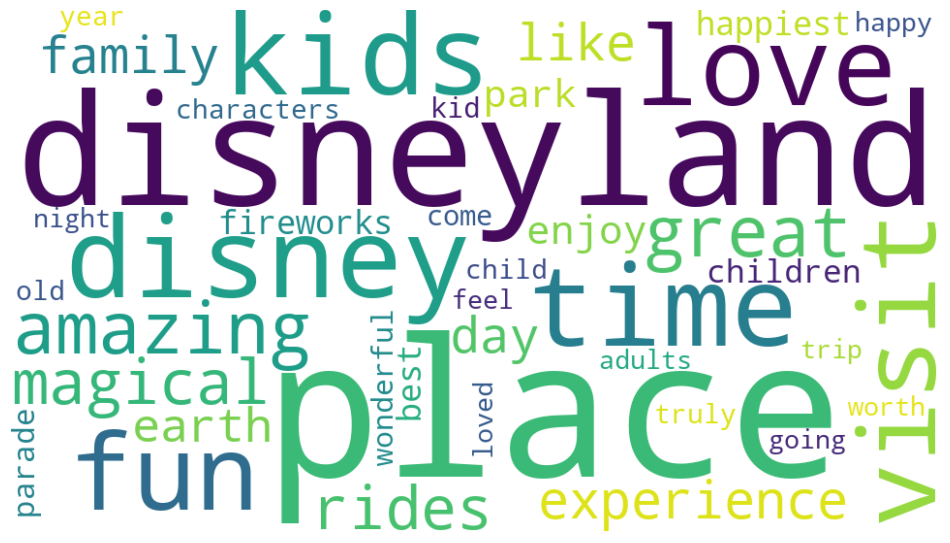

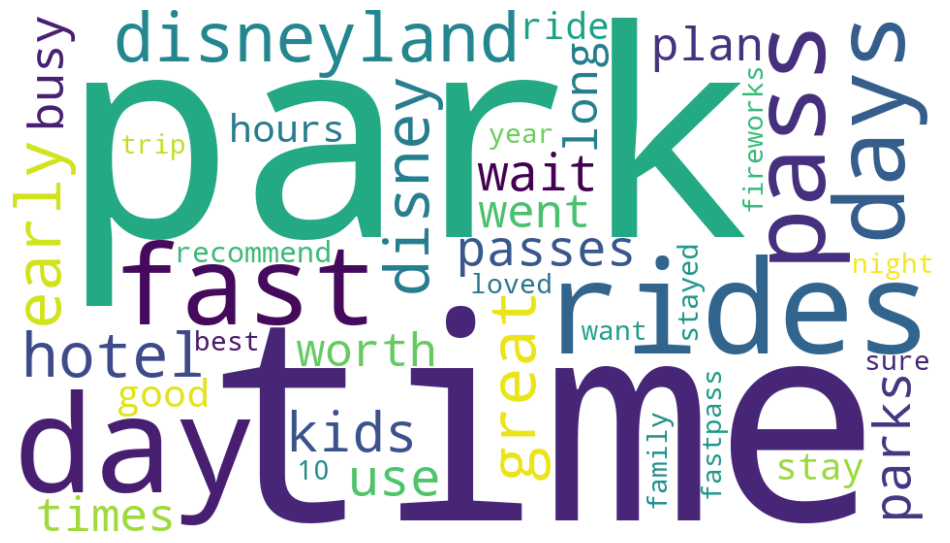

In [24]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [25]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

## Separate data by year

In [27]:
from tqdm.auto import tqdm
import numpy as np

year_data = []

unique_years = np.unique(paragraph_df["Year_Month"])

for year in tqdm(unique_years):
    year_indices = np.array(paragraph_df["Year_Month"] == year)
    if np.any(year_indices):  # Check if there are samples available for the current year
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))

  0%|          | 0/112 [00:00<?, ?it/s]

## Draw time chart

<Axes: xlabel='price'>

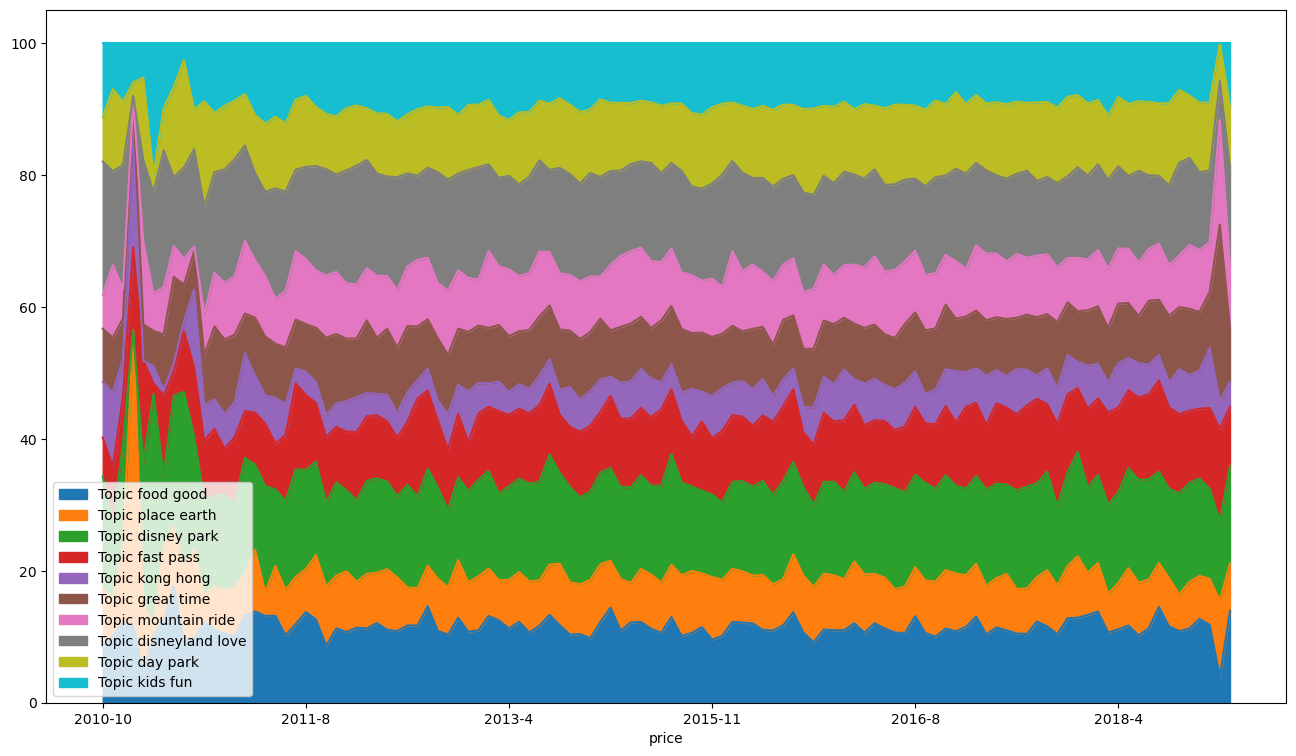

In [28]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["price"] +
topic_names).set_index("price")
df_year.plot.area(figsize=(16,9))